# **Introduction**
# Why study Numerical Analysis?
* Finding approximate solutions to problems for which a method to obtain exact solutions does not exist.
* Make use of computational power for large calculations delivered fast. Example: Solving a system of simultaneous linear equation with one million variables.
* Achieve accuracy by eliminating human errors.
* Infinite processes like computing an infinite series can be approximated using a finite number of steps.

---

# What are the main concerns for designing a method in scientific computing?

Often in scientific computing, there are obvious ways to do approximations; however it is usually the case that the obvious ways are not the best ways. This raises the following concerns:

* What is the best possible method of approximation for a particular problem?
* How accurate is the process we designed?
* How can we measure the efficiency of the method?

Often we see that there is a trade-off between efficiency and accuracy. Thus we need to be able to analyze both in order to make a choice for the best possible algorithm to solve a problem.

---

# Terminology
**Numerical Method :** Any mathematical technique used to approximate a solution to a mathematical problem.

**Analytical Solution :** A closed form expression for unknown variables in terms of the known variables.

**Example:** Solution to the Quadratic equation $ax^2+bx+c=0$ for given $a$, $b$ and $c$ is given by
$$x = \frac{-b \pm \sqrt{(b^2-4ac)}}{2a}$$

**Numerical Solution :** A quantity that approximates the solution to the problem.

---


For the above Quadratic equation, use of numerical method to obtain the solution is not accurate since we already know the exact solution. However, for the following equation, numerical method is necessary since we do not know of any analytical method for obtainig the exact solution to
$$x^2=e^x$$


The following graph shows that a solution exists!

We will learn the numerical method to find the approximate solution to this problem in a later chapter.

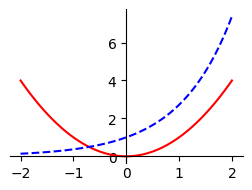

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# define a vector for input variables for the graph
x=np.linspace(-2,2,100)
# define output variable for first function
y1=x**2
# define output variable for second function
y2=np.exp(x)

# define figure object with figure size
fig=plt.figure(figsize=[3,2])
ax = fig.add_subplot(1, 1, 1)

# set desired axes parameters
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# creates the graph for the figure object
plt.plot(x,y1,'r',x,y2,'b--')
# display the graph
plt.show()

---

# **Measuring the Efficiency of Numerical Procedures**

It is common that there are several different numerical methods to solve a problem.
For example, we will see in the later chapters several techniques to find the roots of $f(x)=0$.
How can the relative efficiency of different methods be compared?

# Definition: Big-O Notation
Big-O notation is a mathematical tool used to describe the growth rate of a function as its input becomes large. In Numerical Analysis, it helps us understand the efficiency of algorithms and the error behavior of approximations.



We say that
$$ f(n) = O(g(n)) \;\;\; \text{ as } \;\;\; n \rightarrow \infty$$
(read as "$f$ is big-O of $g$")

if there exist constants $C>0$ and $n_0 > 0$ such that
$$|f(n)| \leq C |g(n)| \;\;\; \forall n \geq n_0.$$

* $f(n)$: the function we are analyzing (e.g., execution time, error).
* $g(n)$: a simpler comparison function (often a polynomial, exponential, or logarithm).

# Example:

$$ f(n) = 5n^2+3n+10 = O(n^2).$$
Here, the $n^2$ term dominates as $ n \rightarrow \infty.$

---

# 1) Operational Count
One way of comparison is to count the number of mathematical operations that are needed to get the result with a given accuracy.

Suppose a method is found to take $f(n)$ multiplications, where $f$ is related to $n$ by,
$$f(n) = 1 + 2 +3+ \cdots+n$$
that is,
$$f(n) = \frac{n(n+1)}{2} = \frac{n^2}{2} + \frac{n}{2}$$

If $n$ is large, the first term dominates and we say that $f$ is in the "order of $n^2$."

In other words we say that the operational count for the method is of $O(n^2)$.

For the above method if $n$ is doubled, the total number of operations increases by four times.




---

# Example:
Consider the following piece of code:

In [ ]:
n = 10

for i in range(n):
    for j in range(i):
        print(i+j,end=" ")
    print()


1 
2 3 
3 4 5 
4 5 6 7 
5 6 7 8 9 
6 7 8 9 10 11 
7 8 9 10 11 12 13 
8 9 10 11 12 13 14 15 
9 10 11 12 13 14 15 16 17 


In [ ]:
for i in range(n):
    for j in range(i):
        print(i,j)

1 0
2 0
2 1
3 0
3 1
3 2
4 0
4 1
4 2
4 3


What is the order of the operational count for the above method?

---

#### **Note: If the order of operational count of a method is $O(n^k)$, then the smaller the value of $k$, the better.**

---

# 2) Varying Size of Parameter
Let us assume that the mathematical problem at hand has a solution $u$, and we have a numerical method that returns an approximate solution $\bar{u}$. It is extremely rare for $u=\bar{u}$ and so we need to ask the question :

How close is $\bar{u}$ to $u$?

We need to know how to quantify the difference between $\bar{u}$ and $u$ for various numerical algorithms.<br><br>

Error in any approximation depends on one or more parameters.

---

For example, given function $y=f(x)$, if we are approximating the derivative $f'(x)$ by the quantity $\frac{f(x+h)-f(x)}{h}$, then the error is dependant on the chosen quantity $h$.

We can write the error as <br> $\hspace{50mm} e(h)=\big|\frac{f(x+h)-f(x)}{h}-f'(x)\big|$<br>

We can quantify this error using powers of $h$, that is, we want to write<br>
$\hspace{50mm} e(h) \leq Ch^k$ for some $k$<br>
where $C$ is a constant for this particular problem but it is independent of $h$ and $k$.<br>
If $k>0$, assuming $h << 1$, as $h \rightarrow 0$ we get $e(h) \rightarrow 0$. We wish $k$ to be large, since the larger the value of $k$ is the faster the error approaches to zero.<br><br><br>

---

### In terms of Big-O
For a numerical method, suppose $u$ is the true solution to a mathematical problem, and $\bar{u}(h)$ is an approximation to the solution that depends on a parameter $h$.

For the error if it holds that

$$e(h) = | u - \bar{u} (h) | \leq Ch^k,$$

with $C$ being a constant independent of $h$ and $k$, then we write

$$e(h) = O(h^k). $$

This is interpreted as "The error is on the order of $h^k$."


* For first order convergence ($k=1$), the error is reduced proportional to the reduction of $h$. Which means that if we cut $h$ in half, the error is also cut in half.
* For second order convergence ($k=2$), if we cut $h$ in half, error reduces to one-forth of its value.

#### **Note: For $h$ being a small value, the larger the value of $k$, the better.**

---


# Example:

If for an algorithm, the error depends only on $h$, then for a sequence of $h$'s <br>
$\hspace{50mm} 1,\frac{1}{2},\frac{1}{4},\frac{1}{8},\frac{1}{16},\frac{1}{32}, \cdots$, <br>
the sequence of errors<br>
$\hspace{50mm} 10, 5, 2.5, 1.25,0.625,0.3125, \cdots$<br>
converges with first order accuracy, i.e. $e(h)=O(h)$ .<br>
And the sequence of errors<br>
$\hspace{50mm} 100, 25, 6.25, 1.5625, 0.390625, 0.09765625, \cdots$<br>
converges with second order accuracy, i.e. $e(h)=O(h^2)$ <br>


We note that the errors for the second-order convergence decrease much faster than the first-order convergence.
<br><br>
It is possible to estimate the value of order $k$ using two data ponts $(h_1,e_1)$ and $(h_2,e_2)$. We assume that<br> $\hspace{50mm}e \approx Ch^k$<br>
with $C$ independent of $h$ and $k$, we get<br>
$\hspace{50mm} e_1 \approx Ch_1^k, e_2 \approx Ch_2^k$<br>
which leads to, <br>
$\hspace{50mm} \large{k \approx \frac{\ln{\frac{e_2}{e_1}}}{\ln{\frac{h_2}{h_1}}}}$

# Exercise:
For a numerical method, suppose $error$ is a function of $h$, and $h$ decreases via the sequence:
$$ 1, \frac{1}{2}, \frac{1}{4}, \frac{1}{8}, \frac{1}{16}, \frac{1}{32}, \cdots$$

Classify the rate of convergence (i.e. the $k$ in $O(h^k)$) for the corresponding sequence of errors:

(a) $\;\;\; 1, \frac{1}{2}, \frac{1}{4}, \frac{1}{8}, \frac{1}{16}, \frac{1}{32}, \cdots$

(b) $\;\;\; 1, \frac{1}{8}, \frac{1}{64}, \frac{1}{256}, \frac{1}{2048}, \frac{1}{16384}, \cdots$

(c) $\;\;\; 1, 0.3536, 0.1250, 0.0442, 0.01563, 0.005524, 0.001953 \cdots$

# Example:
Consider the following piece of code that outputs the error in calculating the derivative for a varying value of the parameter $h$,

In [ ]:
import numpy as np


def f(x):
    return 10**x+2*x+1

def deriv(f,x):
    return (f(x+h)-f(x-h))/(2*h)

print("  h          error")
print("-------------------------------")
for i in range(5):
    h = (1/2)**i
    err = abs((deriv(f,1)) - (10*np.log(10)+2))
    print(f"{h:8.5f}  {err:16.12f}")

  h          error
-------------------------------
 1.00000   26.474149070060
 0.50000    5.434648011575
 0.25000    1.292910767031
 0.12500    0.319237983294
 0.06250    0.079561976411


What is the order of convergence for the above method?

# Let's check

In [ ]:
np.log(26.4741/5.4346)/np.log(1/0.5)

np.float64(2.284335881576565)

In [ ]:
np.log(5.4346/1.2929)/np.log(0.5/0.25)

np.float64(2.0715631597467166)

In [ ]:
np.log(1.2929/0.3192)/np.log(0.25/0.125)

np.float64(2.0180781368176968)

In [ ]:
np.log(0.3192/0.0796)/np.log(0.125/0.0625)

np.float64(2.003620315678697)